In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u

In [2]:
Array = np.loadtxt("GalaxyFromIllustrisTNG50_Stars_Subhalo521803.txt")

Pos = Array[:, 0:3]
Mass = Array[:, 3]
InitialMass = Array[:, 4]
RedshiftFormed = Array[:, 5]

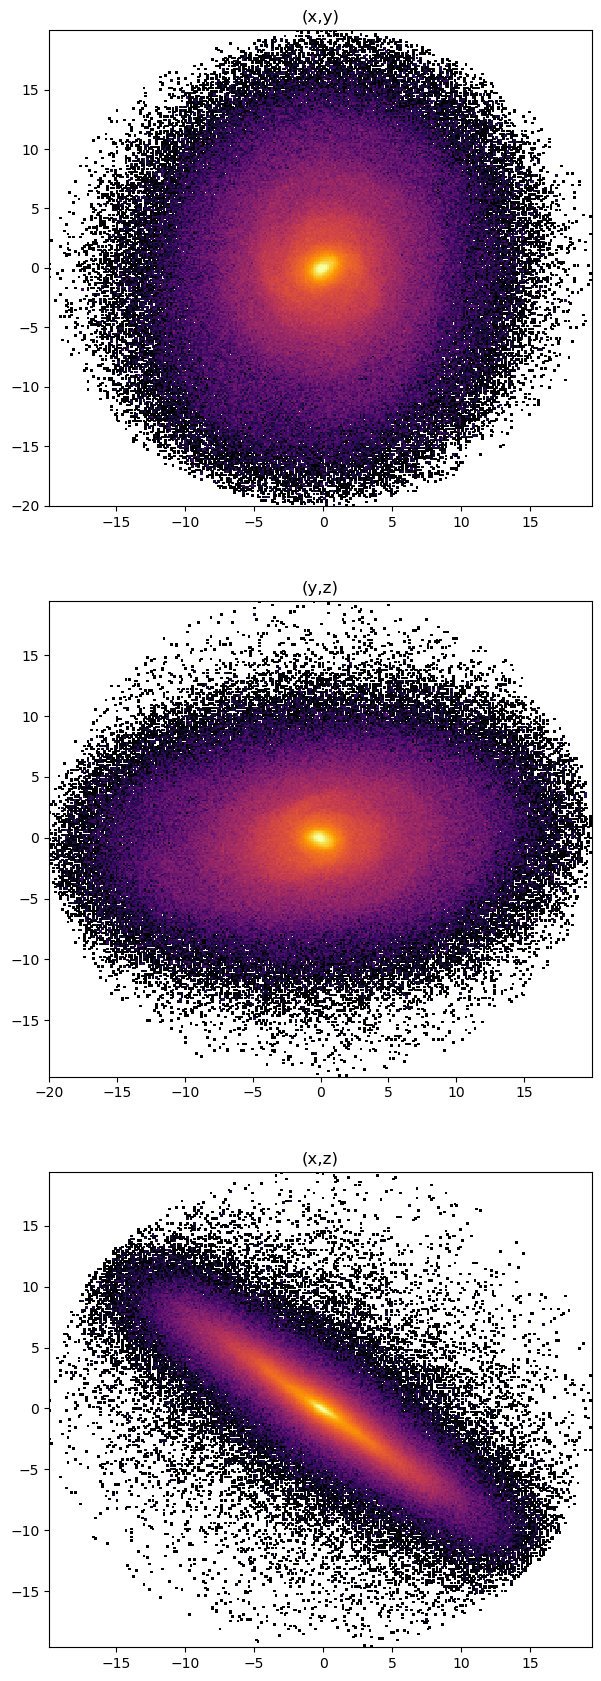

In [3]:
fig, axis = plt.subplots(nrows = 3)
axis[0].hist2d(Pos[:,0], Pos[:,1], norm = LogNorm(), bins = 300, cmap = 'inferno')
axis[0].set_title("(x,y)")
axis[1].hist2d(Pos[:,1], Pos[:,2], norm = LogNorm(), bins = 300, cmap = 'inferno')
axis[1].set_title("(y,z)")
axis[2].hist2d(Pos[:,0], Pos[:,2], norm = LogNorm(), bins = 300, cmap = 'inferno')
axis[2].set_title("(x,z)")
fig.set_figwidth(7)
fig.set_figheight(21)
plt.show()

In [4]:
x = Pos[:, 0]
y = Pos[:, 1]
z = Pos[:, 2]

#Setting up the moment of inertia tensor
tensor = np.zeros((3,3))
tensor[0,0] = np.sum(Mass * (y*y + z*z))
tensor[0,1] = np.sum(-Mass * ( x * y) )
tensor[0,2] = np.sum(-Mass * x * z)
tensor[1,0] = np.sum(-Mass * x * y)
tensor[1,1] = np.sum(Mass * (x*x + z*z))
tensor[1,2] = np.sum(-Mass * y * z)
tensor[2,0] = np.sum(-Mass * x * z)
tensor[2,1] = np.sum(-Mass * y * z)
tensor[2,2] = np.sum(Mass * (x*x + y*y))

eigval, eigvec = np.linalg.eig(tensor)

xdir = eigvec[:, 0]
ydir = eigvec[:, 1]
zdir = np.cross(xdir, ydir)
#And not zdir = eigvec[:, 2], to obtain a right handed system?????

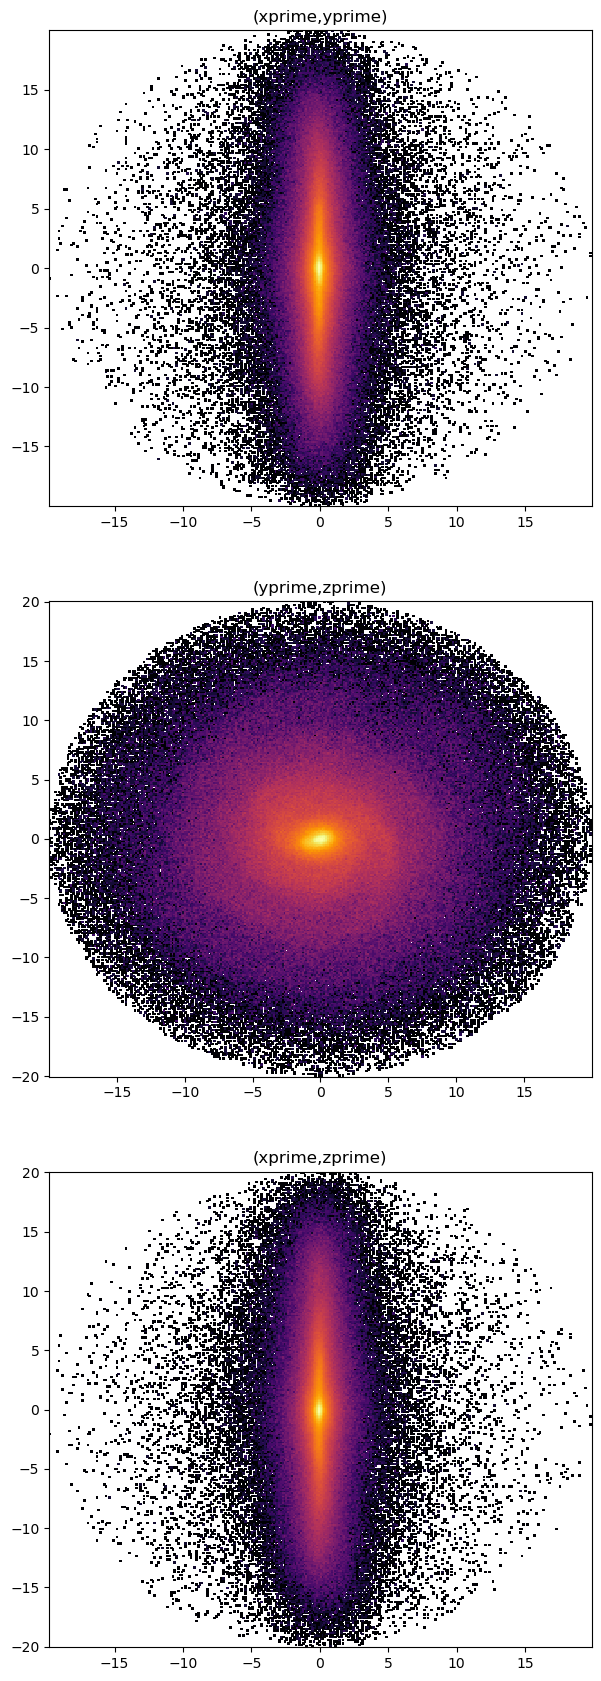

In [5]:
xprime = xdir[0] * x + xdir[1] * y + xdir[2] * z
yprime = ydir[0] * x + ydir[1] * y + ydir[2] * z
zprime = zdir[0] * x +zdir[1] * y + zdir[2] * z


fig, axis1 = plt.subplots(nrows = 3)
axis1[0].hist2d(xprime, yprime, norm = LogNorm(), bins = 300, cmap = 'inferno')
axis1[0].set_title("(xprime,yprime)")
axis1[1].hist2d(yprime, zprime, norm = LogNorm(), bins = 300, cmap = 'inferno')
axis1[1].set_title("(yprime,zprime)")
axis1[2].hist2d(xprime, zprime, norm = LogNorm(), bins = 300, cmap = 'inferno')
axis1[2].set_title("(xprime,zprime)")
fig.set_figwidth(7)
fig.set_figheight(21)
plt.show()

In [6]:
#Since it is flat in the yz plane that must mean that it's axis is around the x' plane?
eigvec
#Not sure how to find the largest eigenvalue via the eigenvector

array([[ 0.61938832, -0.7764765 , -0.11594116],
       [-0.08683226, -0.21452842,  0.9728503 ],
       [ 0.78026808,  0.59250468,  0.20029961]])

In [7]:
R = np.sqrt(yprime*yprime + zprime*zprime)
R

array([ 0.06508322,  0.1059887 ,  0.06440539, ...,  9.64567576,
       19.03063647,  9.45627363])

In [ ]:
R = R*u.kpc
radii = np.linspace(R.min(), R.max(), 20)
radii = radii
massinbins = [0 for i in range(20)]
#Massinbins
#plt.hist(radii, Mass)
#plt.show()

massradius = [[R[i],Mass[i]] for i in range(len(R))]
for i in massradius:
    for j in range(20):
        if i[0]<=radii[j]:
            massinbins[j] += i[1]


In [ ]:
density = massinbins/(2*np.pi*radii*(radii[2] - radii[1]))
plt.hist(radii, density)
plt.semilogy()
plt.show()


In [21]:
R

<Quantity [ 0.06508322,  0.1059887 ,  0.06440539, ...,  9.64567576,
           19.03063647,  9.45627363] kpc>